<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Merging, Joining, Concatenation, and Grouping Practice

Week 2 | Lesson 4.1

---

## Joining and concatenation


Concatenation is taking two or more separately located things and placing them
side-by-side next to each other so that they can now be treated as one thing. In
computer programming and data processing, two or more character strings are sometimes
concatenated for the purpose of saving space or so that they can be addressed as a
single item.

Joins using pandas happen when columns of two DataFrames are joined either on index
or on a key column. Here is a representation of left, right, inner, and outer joins
using Venn diagrams.

![](./assets/joins.png)

---

### Concatenation in numpy

In [325]:
#Join Types
#Inner Join
    #- Intersection of common keys. Returns only common intersection
#Left & Right Join
    #- All values on left and only matching other values
#Full Join
    #- All values together and only remaining common intersection

In [326]:
import numpy as np
import pandas as pd

In [327]:
#Basic Python -> [1,2,3] + [4,5,6] = [1,2,3,4,5,6] -> list concatenation
#Numpy -> [1,2,3] + [4,5,6] = [5,7,9] -> Elementwise list addition


#### `np.concatenate()`

In [328]:
a, b = [1,2,3], [4,5,6]

In [329]:
#Basic Python
a+b

[1, 2, 3, 4, 5, 6]

In [330]:
#Numpy
np.array(a) + np.array(b)

array([5, 7, 9])

In [331]:
# Numpy concatenation of np.arrays -> same result as basic python
np.concatenate((a, b))

array([1, 2, 3, 4, 5, 6])

In [332]:
np.array([a, b])

array([[1, 2, 3],
       [4, 5, 6]])

#### What about stacking the two vectors vertically?

Our two arrays are 1-dimensional. We can make them 2-dimensional by adding an axis with `np.newaxis`. (This is just one of many ways to do this.

In [333]:
a = np.array(a)
b = np.array(b)
print a, b
a[:, np.newaxis]

[1 2 3] [4 5 6]


array([[1],
       [2],
       [3]])

If the vectors are 2D we can concatenate along `axis=0` or `axis=1`.

In [334]:
#Switch a to verticle
#Switch b to verticle
#Concatenate accross columns
np.concatenate([a[:,np.newaxis], b[:,np.newaxis]], axis=1) #Can add .T to the end to transpose results

array([[1, 4],
       [2, 5],
       [3, 6]])

---

### Concatenation in pandas

In [335]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])

In [336]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [337]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [338]:
#Similar to np.concatenate
pd.concat((df1, df2), axis=0) #Stack dataframes (axis = 0) by columns
pd.concat([df1,df2.reset_index(drop=True)], axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


---

### Left, right, inner, outer joins

Pandas `merge` function allows us to join together DataFrames using columns as keys.

[(Same walkthrough can be found here.)](http://chrisalbon.com/python/pandas_join_merge_dataframe.html)

In [339]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data)

df_a

,first_name,last_name,subject_id
0,Alex,Anderson,1
1,Amy,Ackerman,2
2,Allen,Ali,3
3,Alice,Aoni,4
4,Ayoung,Atiches,5


In [340]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data)

df_b

,first_name,last_name,subject_id
0,Billy,Bonder,4
1,Brian,Black,5
2,Bran,Balwner,6
3,Bryce,Brice,7
4,Betty,Btisan,8


In [341]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data)

df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


Now, we will merge with a left join produces a complete set of records from `df_a`, with the matching records (where available) in `df_b`. If there is no match, the right side will contain null.

#### Left join `df_b` onto `df_a` by `subject_id`.



In [342]:
#Takes a left and right dataframe and a how= arguement and an on= arg
#We want all in left and bring over all matching in B. Everything that doesn't match in B turns into NaN
pd.merge(df_a, df_b, how='left', on='subject_id') #Example of Left Join

,first_name_x,last_name_x,subject_id,first_name_y,last_name_y
0,Alex,Anderson,1,NaN,NaN
1,Amy,Ackerman,2,NaN,NaN
2,Allen,Ali,3,NaN,NaN
3,Alice,Aoni,4,Billy,Bonder
4,Ayoung,Atiches,5,Brian,Black


#### Right join `df_b` onto `df_a` by `subject_id`

Merge with a right join produces a complete set of records from `df_b`, with the matching records (where available) in `df_a`. If there is no match, the left side will contain null.


In [343]:
#Keep everything in right and bring over data from left dataframe where key matches
pd.merge(df_a, df_b, how='right', on='subject_id')

,first_name_x,last_name_x,subject_id,first_name_y,last_name_y
0,Alice,Aoni,4,Billy,Bonder
1,Ayoung,Atiches,5,Brian,Black
2,NaN,NaN,6,Bran,Balwner
3,NaN,NaN,7,Bryce,Brice
4,NaN,NaN,8,Betty,Btisan


#### Outer join `df_b` onto `df_a` by `subject_id`

An outer join produces the set of all records in `df_a` and `df_b`, with matching records from both sides where available. If there is no match, the missing side will contain null.

In [344]:
pd.merge(df_a, df_b, how='outer', on='subject_id')

,first_name_x,last_name_x,subject_id,first_name_y,last_name_y
0,Alex,Anderson,1,NaN,NaN
1,Amy,Ackerman,2,NaN,NaN
2,Allen,Ali,3,NaN,NaN
3,Alice,Aoni,4,Billy,Bonder
4,Ayoung,Atiches,5,Brian,Black
5,NaN,NaN,6,Bran,Balwner
6,NaN,NaN,7,Bryce,Brice
7,NaN,NaN,8,Betty,Btisan


#### Inner join `df_b` onto `df_a` by `subject_id`

An inner join produces only the set of records that match in both df_a and df_b.

In [345]:
#only retain rows where subject_id matches in both -> most common SQL operation
pd.merge(df_a, df_b, how='inner', on='subject_id')

,first_name_x,last_name_x,subject_id,first_name_y,last_name_y
0,Alice,Aoni,4,Billy,Bonder
1,Ayoung,Atiches,5,Brian,Black


#### Combine the information in `df_a`, `df_b` and `df_n` using joins

No information should be lost.

#### Combine the information in the three datasets only where all columns are valid.b

In [346]:
pd.merge(df_n , pd.merge(df_a, df_b, how='outer', on='subject_id'), how='outer', on='subject_id')
#Left = All of left stays and bring over matching right
#Right = All of right stays and bring over matching left
#Outer = All data stays and data is merged
#Inner = Match on key and all other data is deleted

,subject_id,test_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,51.0,Alex,Anderson,NaN,NaN
1,2,15.0,Amy,Ackerman,NaN,NaN
2,3,15.0,Allen,Ali,NaN,NaN
3,4,61.0,Alice,Aoni,Billy,Bonder
4,5,16.0,Ayoung,Atiches,Brian,Black
5,7,14.0,NaN,NaN,Bryce,Brice
6,8,15.0,NaN,NaN,Betty,Btisan
7,9,1.0,NaN,NaN,NaN,NaN
8,10,61.0,NaN,NaN,NaN,NaN
9,11,16.0,NaN,NaN,NaN,NaN


In [347]:
#Python Reduce() keyword
reduce(lambda x, y: x + y, [1,2,3,4])
'''
Apply a function of two arguments cumulatively to the items of a sequence,
from left to right, so as to reduce the sequence to a single value.
For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
of the sequence in the calculation, and serves as a default when the
sequence is empty.
'''

'\nApply a function of two arguments cumulatively to the items of a sequence,\nfrom left to right, so as to reduce the sequence to a single value.\nFor example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates\n((((1+2)+3)+4)+5).  If initial is present, it is placed before the items\nof the sequence in the calculation, and serves as a default when the\nsequence is empty.\n'

---

## Pandas manipulation with chipotle order data

Now we'll practice the pandas topics covered this far, especially more advanced split-apply-combine patterns, with a dataset on chipotle orders.


### Load packages and data

In [348]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [349]:
chip_file = '/Users/austinwhaley/Desktop/DSI-SF-4/datasets/chipotle_orders/chipotle.tsv'
chip = pd.read_csv(chip_file, sep='\t')
chip.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


The chipotle orders data is messy: the column with ingredients in the order is a list of lists, which will need to be dealt with. This specifically will also be practice with long and wide format data.

---

### 1. Create a sub-id for each order-id

We have an identifier for each order already in `order_id`, but no unique identifier for each _sub-order_ within the overall order.

Use grouping to assign sub-ids for orders.

In [350]:
#sub_order_id

sub_order_id = chip.groupby(['order_id']).cumcount() + 1
chip.insert(1, 'sub_order_id', sub_order_id)
chip.head()

,order_id,sub_order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,2,1,Izze,[Clementine],$3.39
2,1,3,1,Nantucket Nectar,[Apple],$3.39
3,1,4,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,1,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


---

### 2. Clean up the price column 

We want the price column to be a numeric float value. Currently it is a string (and has the dollar sign in it).

In [351]:
chip['item_price'] = chip['item_price'].map(lambda x: float(x.replace('$', " ")))


---

### 3. Make a new categorical column for broader item type

Currently we have many different item types. Make a new column that only has 5 different broad item types. You should have these types in the new column in your DataFrame:

    chips
    drink
    burrito
    taco
    salad
    
(Put the `bowl` items into `burrito` category).

In [352]:
chip.head(1)

,order_id,sub_order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,NaN,2.39


In [353]:
# def broad_cat_sort(x):
#     x = x.lower()
#     if 'burrito' in x or 'bowl' in x:
#         return 'burrito'
#     elif 'chips' in x or 'chip' in x:
#         return 'chips'
#     elif 'taco' in x:
#         return 'taco'
#     elif 'salad' in x:
#         return 'salad'
#     else:
#         return 'drink'
    
    
def item_cat(x) :
    x = x.lower()
    if 'chips' in x :
        return 'chips'
    elif 'salad' in x:
        return 'salad'
    elif 'tacos' in x:
        return 'tacos'
    elif 'burrito' in x or 'bowl' in x:
        return 'burrito'
    else :
        return 'drink'
    
chip['item_category'] = chip['item_name'].map(item_cat)
    
#chip['item_category'] = chip['item_name'].map(broad_cat_sort)

In [354]:
chip.head()

,order_id,sub_order_id,quantity,item_name,choice_description,item_price,item_category
0,1,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,chips
1,1,2,1,Izze,[Clementine],3.39,drink
2,1,3,1,Nantucket Nectar,[Apple],3.39,drink
3,1,4,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,chips
4,2,1,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,burrito


---

### 4. Calculate the total price by `order_id` and add as a new as column `order_total_price`.

There are a variety of different ways you can tackle this problem. One way is a grouped apply on the price and then a merge by `order_id` with the total price.

Hints:

- Merging DataFrames with series doesn't work, you need to merge 2 DataFrames.
- A series object coming out of a groupby with an apply will have the groupby as potentially hierarchical indices. Using `reset_index()` will turn these back into columns and also convert to a DataFrame, which can be used to merge on.

In [355]:
chip.head(1)

,order_id,sub_order_id,quantity,item_name,choice_description,item_price,item_category
0,1,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,chips


In [356]:
order_prices = chip.groupby('order_id')['item_price'].apply(np.sum).reset_index()
#order_prices.head()
order_prices.columns = ['order_id', 'total_order_price']
order_prices.head(3)

,order_id,total_order_price
0,1,11.56
1,2,16.98
2,3,12.67


chip = pd.merge(chip, order_prices, how='left', on='order_id')
chip.head(10)

---

### 5. Make an `adjusted_item_price` column to account for multiple orders per row.

Some items have multiple orders per row, as indicated by the quantity. Adjust the price to account for the number of orders in a new column.

In [357]:
adj_item_price = [x / y for x, y in zip(chip['item_price'], chip['quantity'])]
chip.insert(6, 'adj_item_price', adj_item_price)

#Better way
#adj_item_price = chip['item_price'] / chip['quantity']
chip.head()

,order_id,sub_order_id,quantity,item_name,choice_description,item_price,adj_item_price,item_category
0,1,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,chips
1,1,2,1,Izze,[Clementine],3.39,3.39,drink
2,1,3,1,Nantucket Nectar,[Apple],3.39,3.39,drink
3,1,4,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,chips
4,2,1,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,burrito


---

### 6. What is the min, max, count, mean and standard deviation price per the `item_name`?

Pivot table works well for this. Remember you can pass multiple functions into the `aggfunc` argument.

The count won't just be the length of each order's subset - remember that there are multiple orders per row sometimes as shown in the quantity column!

In [358]:
item_summaries = pd.pivot_table(chip, values='adj_item_price', 
                               columns='item_name', aggfunc=[np.max, np.min, np.mean, np.std]).reset_index()

item_summaries.head()

,item_name,amax,amin,mean,std
0,6 Pack Soft Drink,6.49,6.49,6.490000,0.000000
1,Barbacoa Bowl,11.75,8.69,10.187273,1.260994
2,Barbacoa Burrito,11.75,8.69,9.832418,1.139519
3,Barbacoa Crispy Tacos,11.75,8.99,10.087273,1.270701
4,Barbacoa Salad Bowl,11.89,9.39,10.640000,1.317616


In [359]:
item_counts = pd.pivot_table(chip, values='quantity', columns='item_name',
                             aggfunc=np.sum)
item_counts = item_counts.reset_index()
item_counts.head()

,item_name,quantity
0,6 Pack Soft Drink,55
1,Barbacoa Bowl,66
2,Barbacoa Burrito,91
3,Barbacoa Crispy Tacos,12
4,Barbacoa Salad Bowl,10


In [360]:
item_summaries = pd.merge(item_summaries, item_counts, how='left', on='item_name')
item_summaries.head()


,item_name,amax,amin,mean,std,quantity
0,6 Pack Soft Drink,6.49,6.49,6.490000,0.000000,55
1,Barbacoa Bowl,11.75,8.69,10.187273,1.260994,66
2,Barbacoa Burrito,11.75,8.69,9.832418,1.139519,91
3,Barbacoa Crispy Tacos,11.75,8.99,10.087273,1.270701,12
4,Barbacoa Salad Bowl,11.89,9.39,10.640000,1.317616,10


---

### 7. Plot the mean price of items against the count (popularity)

You have this info in your summary table from the previous question.

In [362]:
chip.head(1)

,order_id,sub_order_id,quantity,item_name,choice_description,item_price,adj_item_price,item_category
0,1,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,chips


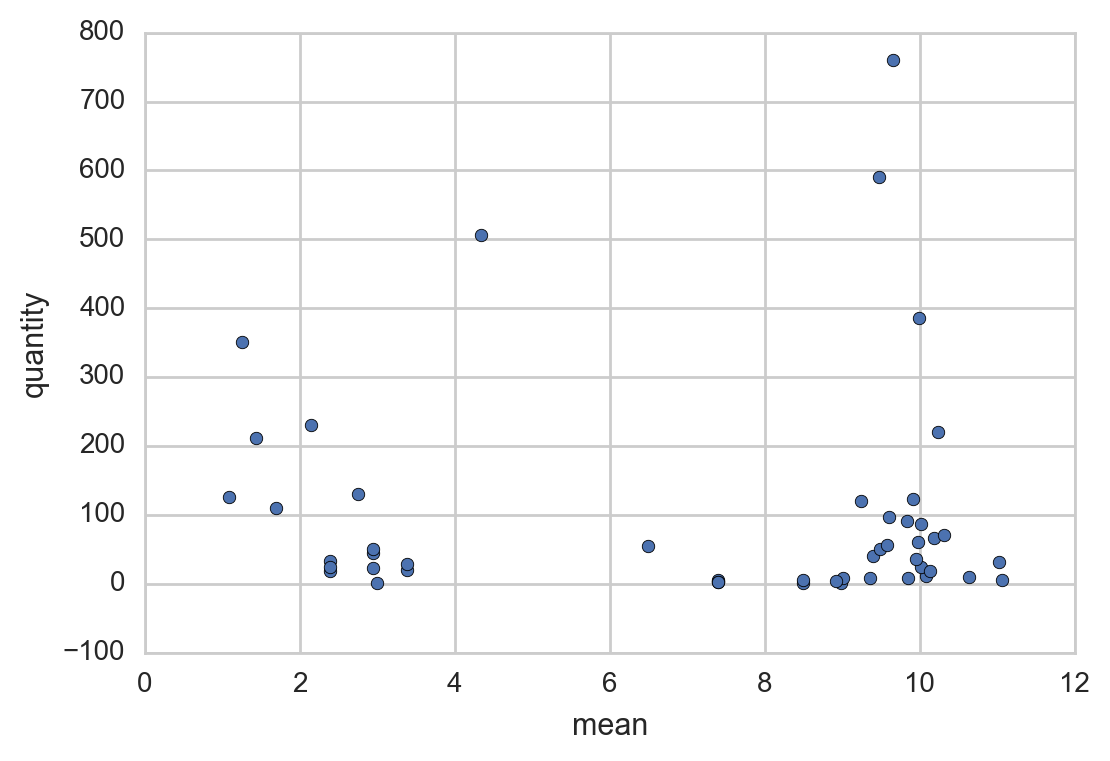

In [365]:
item_summaries.plot.scatter('mean', 'quantity')

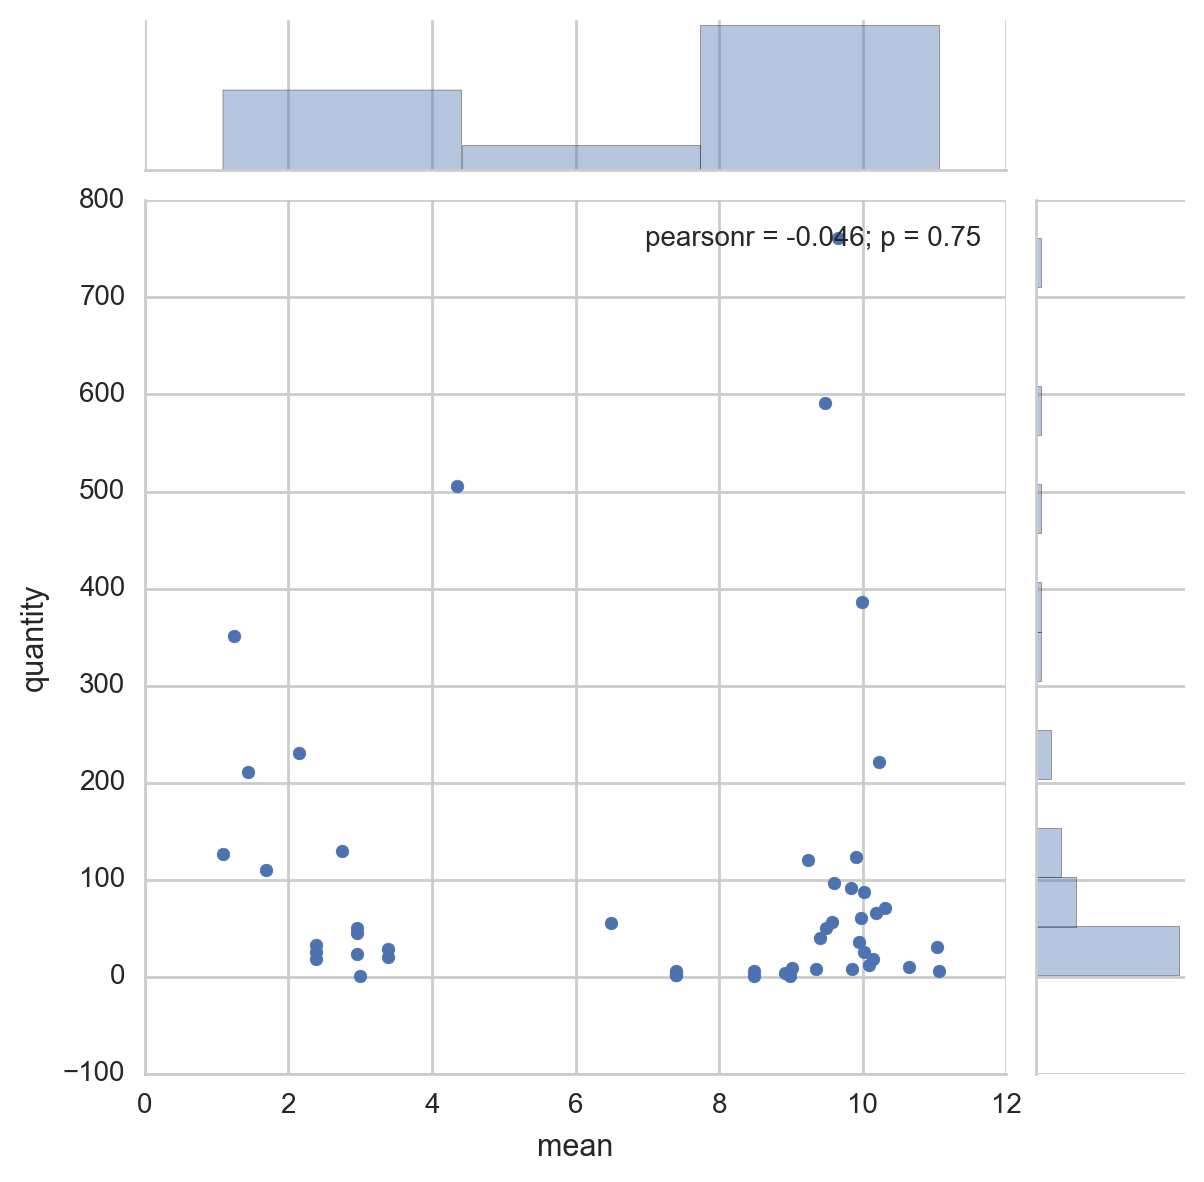

In [367]:
#Seaborn
sns.jointplot(x='mean', y='quantity', data=item_summaries)

---

### 7.2 Plot the max price of items against the count (popularity)


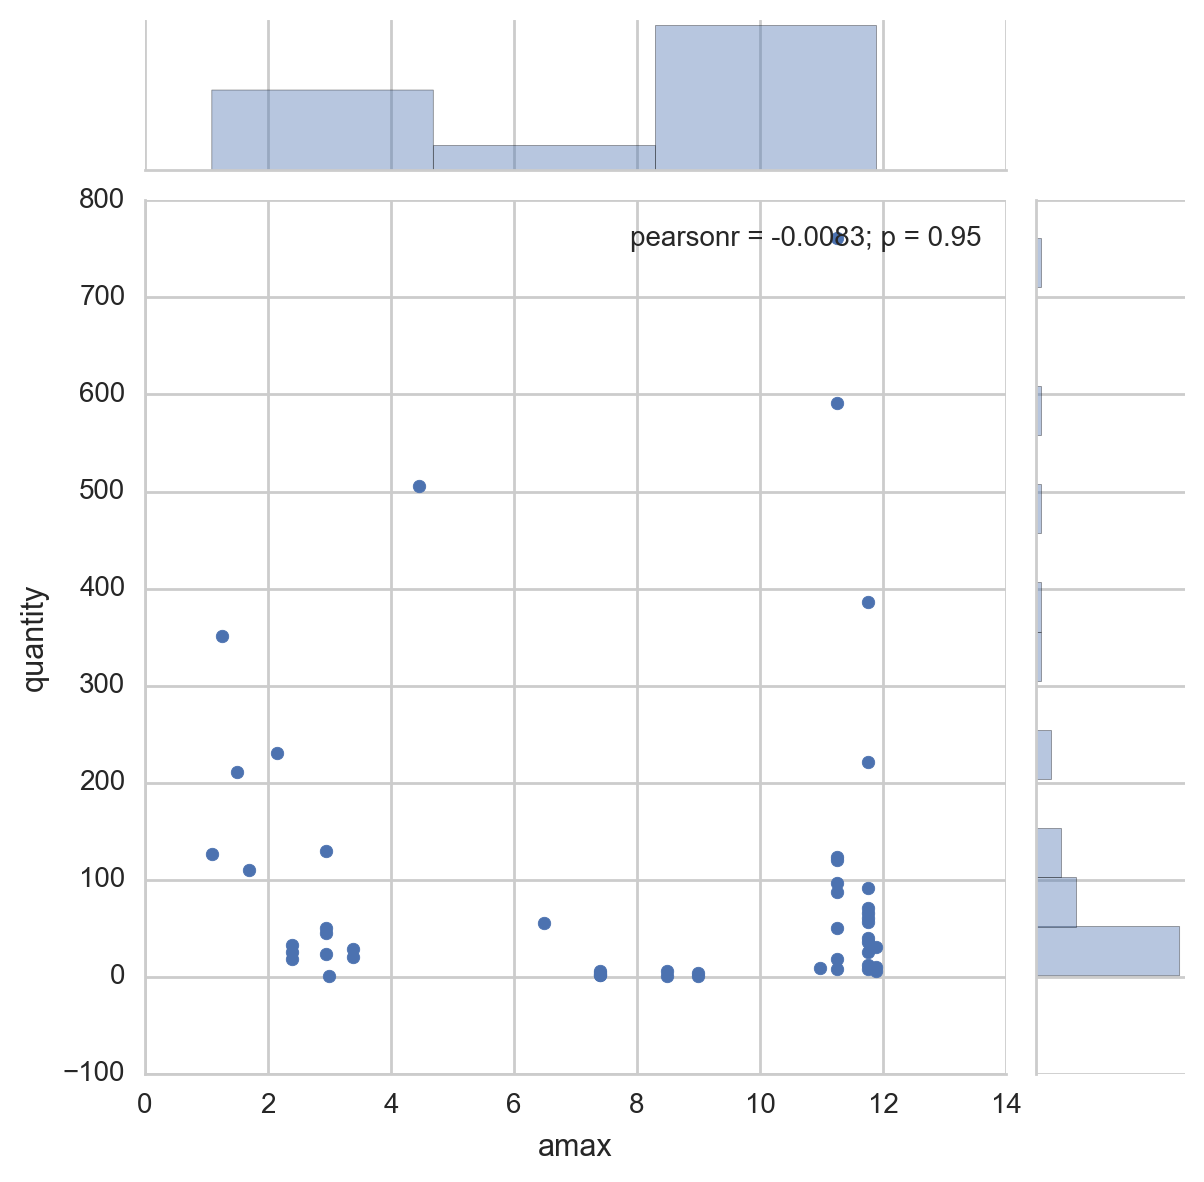

In [368]:
sns.jointplot(x='amax', y='quantity', data=item_summaries)

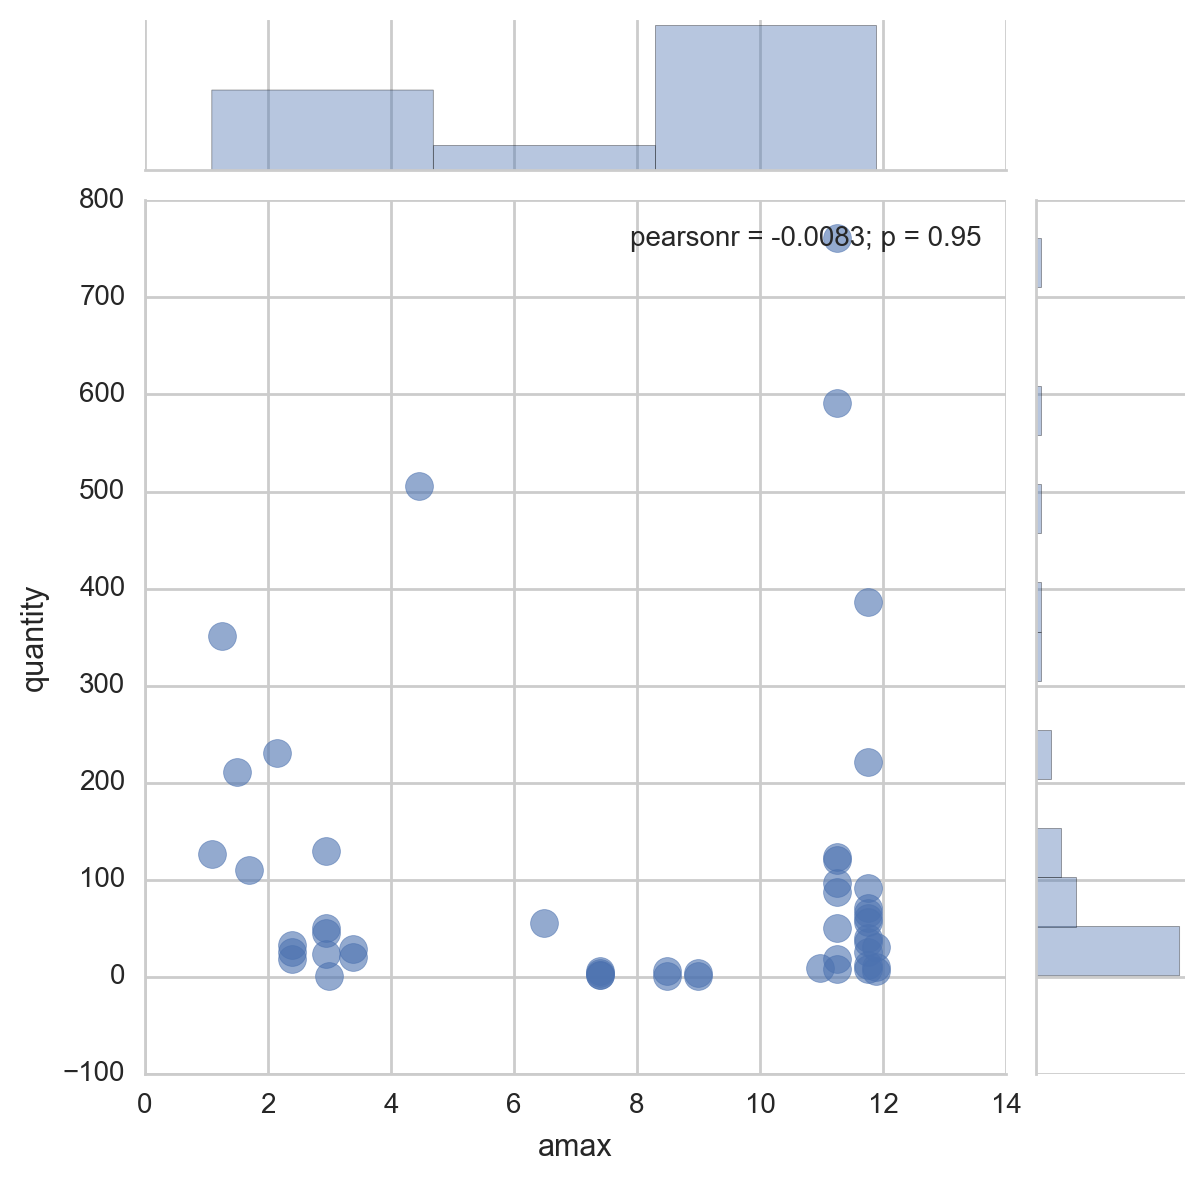

In [370]:
#seaborn joint_kws capability
sns.jointplot(x='amax', y='quantity', data=item_summaries,
             joint_kws={'s':100, 'alpha':0.6})

---

### 8. Calculate the mean of adjusted price for broad category

You can handle these with a single function if you want, or another way if you prefer.

Just FYI, apply functions can have keyword arguments that you pass in when you call the apply chained to the groupby.

for example:

```python
def my_applier(df, my_kwarg='placeholder'):
    df['newcol_'+placeholder] = 1.
    return df
    
data = data.groupby('variable').apply(my_applier, my_kwarg='colsuffix').reset_index(drop=True)
```


### 8.2 Make a barplot of your price mean by the broad type category


---

### 9. [HARD] Parse the `choice_description` column into two new columns: `order_customizations` and `order_customization_id`

Here is what your inputs and outputs would look like for a hypotheical section of the DataFrame (I'm just showing some of the columns to give you an idea of what the output format will be):

**Input:**

```python
                                  choice_description     item_name  order_id  \
0                                       [Clementine]          Izze         1   
1  [Red Salsa, [Black Beans, Guacamole, Sour Cream]]  Chicken Bowl         1   

   sub_order_id  
0             1  
1             2
```

**Output:**

```python
   order_customization_id order_customizations  \
0                       0           Clementine   
1                       0            Red Salsa   
2                       1          Black Beans   
3                       2            Guacamole   
4                       3           Sour Cream   

                                  choice_description     item_name  order_id  \
0                                       [Clementine]          Izze         1   
1  [Red Salsa, [Black Beans, Guacamole, Sour Cream]]  Chicken Bowl         1   
2  [Red Salsa, [Black Beans, Guacamole, Sour Cream]]  Chicken Bowl         1   
3  [Red Salsa, [Black Beans, Guacamole, Sour Cream]]  Chicken Bowl         1   
4  [Red Salsa, [Black Beans, Guacamole, Sour Cream]]  Chicken Bowl         1   

   sub_order_id  
0             1  
1             2  
2             2  
3             2  
4             2 
```

Hints:

- Remember you can write your own function and pass it into apply. In this case there will be one item per group, since we have to do this parsing for every row, but you may be able to get a solution with `.iterrows()` if you want to try that out.
- Within a function that you are passing into `.apply()`, you can create a _new DataFrame and return that._ This is one of the things that makes apply so powerful, since you can essentially perform any operations you want on a subset of your original DataFrame as long as you return DataFrames/groups that can be recombined.

**Note: the function may take awhile to complete. `apply` isn't terribly efficient with complicated custom operations per row like this.**